In [1]:
import config
import cmath
import matplotlib.pyplot as plt
import numpy as np
from main import run
from bg import harmonic
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

pygame 2.0.3 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def runSim(series):
    config.series = series
    config.domain = (-1, 1)
    config.range = (-1, 1)
    run()

In [3]:
ys = np.array(pdr.get_data_yahoo("MSFT")['Adj Close'].pct_change().iloc[1:])
xs = np.array(list(range(len(ys))))

[*********************100%***********************]  1 of 1 completed


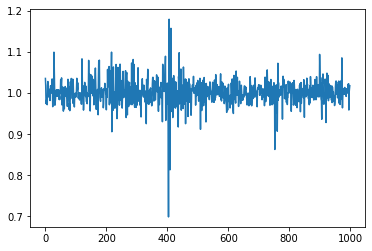

In [4]:
sampleSize = 1000
freq = sampleSize

ySample = ys[:sampleSize] + 1
xSample = xs[:sampleSize]

plt.plot(ySample)

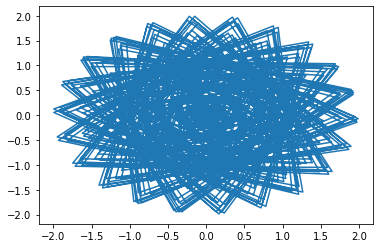

In [37]:
f = 2 / (2*cmath.pi)

xSample = np.arange(0, 2*cmath.pi, 0.01)
ySample = [ np.sin(2*x)+1 for x in xSample ]

cs = [ ySample[i] * cmath.exp(-2*cmath.pi*1j*i*f) for i in range(len(ySample)) ]
cs_r = [ c.real for c in cs ]
cs_i = [ c.imag for c in cs ]
plt.plot(cs_r, cs_i)


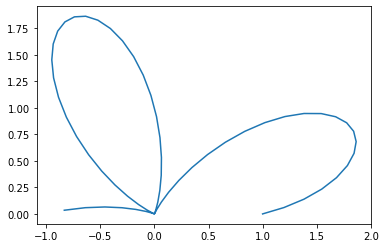

In [20]:
def plotCardioid(ySample, freq):
    cs = [ cmath.rect(ySample[i], i/freq/2) for i in range(len(ySample)) ]
    xs = [ c.real for c in cs ]
    ys = [ c.imag for c in cs ]
    plt.plot(xs, ys)
    
plotCardioid(ySample, 10)

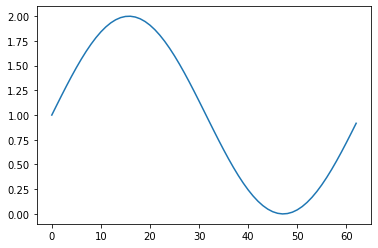

In [6]:
plt.plot(ySample)

In [7]:
cs_r, cs_i

([1.0,
  -1.0998334166468282,
  1.1986693307950613,
  -1.2955202066613396,
  1.3894183423086506,
  -1.479425538604203,
  1.5646424733950355,
  -1.644217687237691,
  1.7173560908995227,
  -1.7833269096274833,
  1.8414709848078965,
  -1.8912073600614354,
  1.9320390859672263,
  -1.963558185417193,
  1.9854497299884604,
  -1.9974949866040546,
  1.999573603041505,
  -1.9916648104524686,
  1.9738476308781951,
  -1.9463000876874146,
  1.9092974268256817,
  -1.8632093666488738,
  1.80849640381959,
  -1.74570521217672,
  1.6754631805511506,
  -1.5984721441039564,
  1.5155013718214643,
  -1.4273798802338298,
  1.3349881501559047,
  -1.239249329213982,
  1.1411200080598671,
  -1.0415806624332904,
  0.9416258565724199,
  -0.8422543058567513,
  0.7444588979731683,
  -0.6492167723103801,
  0.5574795567051476,
  -0.4701638590915066,
  0.38814210905728075,
  -0.3122338408160259,
  0.2431975046920718,
  -0.1817228889355892,
  0.1284242275864118,
  -0.0838340632505451,
  0.04839792611048399,
  -0.02246

In [31]:
sampleSize = 10
numSamples = sampleSize*2+1
freq = 1 / numSamples

it = int(len(ys) / numSamples)
ySample = ys[::it][:numSamples]
xSample = xs[::it][:numSamples]


In [32]:
list(zip(xSample, ySample))

[(0, 0.03571177151755589),
 (427, -0.03645630827442914),
 (854, 0.009216550379716804),
 (1281, -0.010101135023679153),
 (1708, 0.008683281138308407),
 (2135, 0.016017975394246875),
 (2562, 0.016556458215923664),
 (2989, 0.007235914806155153),
 (3416, 0.011665780346379773),
 (3843, -0.01634899673453938),
 (4270, 0.011843434937051756),
 (4697, -0.003965915389722241),
 (5124, 0.005567750739452038),
 (5551, 0.03957606012326398),
 (5978, -0.0010017882842967563),
 (6405, -0.0100231368220417),
 (6832, 0.03403989405923191),
 (7259, -0.008980916443995124),
 (7686, -0.003988691913270781),
 (8113, 0.012868403937728035),
 (8540, -0.01475861812477608)]

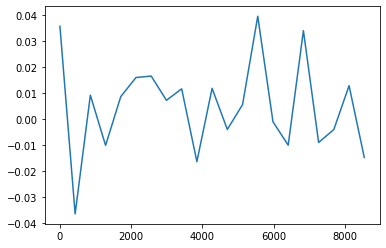

In [33]:
plt.plot(xSample, ySample)

In [34]:
def pointToComplex(x, y):
    return y+x*1j

def degToRad(x, freq):
    return x * freq * cmath.pi * 2

def sampleToPolar(xSample, ySample, freq):
    (ySample[i]+0j) * math.exp(2*cmath.pi*1j*freq*x) 
    for i in range(len(ySample)):
        x = degToRad(xSample[i], freq)
        (ySample[i]+0j) * math.exp(2*cmath.pi*1j*freq*x) 

freq = 1
series = [
    (pointToComplex(xSample[i], ySample[i]), i-sampleSize)
    for i in range(0, len(ySample))
]

# harmonic(series[0], 0)

# run(series, span=1)
# # run()

In [35]:
series

[((0.03571177151755589+0j), -10),
 ((-0.03645630827442914+427j), -9),
 ((0.009216550379716804+854j), -8),
 ((-0.010101135023679153+1281j), -7),
 ((0.008683281138308407+1708j), -6),
 ((0.016017975394246875+2135j), -5),
 ((0.016556458215923664+2562j), -4),
 ((0.007235914806155153+2989j), -3),
 ((0.011665780346379773+3416j), -2),
 ((-0.01634899673453938+3843j), -1),
 ((0.011843434937051756+4270j), 0),
 ((-0.003965915389722241+4697j), 1),
 ((0.005567750739452038+5124j), 2),
 ((0.03957606012326398+5551j), 3),
 ((-0.0010017882842967563+5978j), 4),
 ((-0.0100231368220417+6405j), 5),
 ((0.03403989405923191+6832j), 6),
 ((-0.008980916443995124+7259j), 7),
 ((-0.003988691913270781+7686j), 8),
 ((0.012868403937728035+8113j), 9),
 ((-0.01475861812477608+8540j), 10)]

In [36]:
(1+cmath.pi/2*1j) * cmath.exp(cmath.pi * 2 * 1j * 0)

(1+1.5707963267948966j)

In [37]:
degToRad(5, 1/5)

6.283185307179586

[(0.03571177151755589+8.746861336171287e-17j), (-0.036456308274431165+0.9201261656835412j), (0.009216550379715157+0.8402523313670827j), (-0.010101135023680458+0.7603784970497145j), (0.008683281138307408+0.6805046627341653j), (0.01601797539424614+0.6006308284158877j), (0.016556458215923154+0.520756994099429j), (0.007235914806154829+0.4408831597829703j), (0.011665780346379596+0.36100932546833064j), (-0.016348996734539448+0.281135491150053j), (0.011843434937051756+0.20126165683177533j), (-0.0039659153897222115+0.12138782251713565j), (0.0055677507394520575+0.04151398819885799j), (0.039576060123264686+0.9616401538805803j), (-0.0010017882842958924+0.8817663195659406j), (-0.010023136822040719+0.801892485251301j), (0.034039894059232974+0.7220186509366613j), (-0.008980916443994022+0.6421448166147457j), (-0.0039886919132696794+0.562270982300106j), (0.012868403937729098+0.48239714798546623j), (-0.014758618124775094+0.4025233136635507j)]


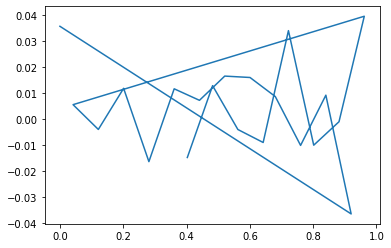

In [154]:
rX = np.array(xSample) * 2 * cmath.pi * freq % (1/freq)
results = [(ySample[i]+rX[i]*1j) * cmath.exp(2*cmath.pi*1j*(i-sampleSize)) 
           for i in range(0, numSamples) ]
# rX = [ r.imag for r in results ]
rY = [ r.real for r in results ]
print(results)
plt.plot(rX, rY)

In [153]:
np.array(xSample) * 2 * cmath.pi * freq % (1/freq)

array([0.        , 0.92012617, 0.84025233, 0.7603785 , 0.68050466,
       0.60063083, 0.52075699, 0.44088316, 0.36100933, 0.28113549,
       0.20126166, 0.12138782, 0.04151399, 0.96164015, 0.88176632,
       0.80189249, 0.72201865, 0.64214482, 0.56227098, 0.48239715,
       0.40252331])

In [149]:
results

[(0.03571177151755589+8.746861336171287e-17j),
 (-0.0364563082753704+427j),
 (0.009216550378043446+854j),
 (-0.010101135025875434+1281j),
 (0.008683281135798372+1708j),
 (0.016017975391632255+2135j),
 (0.016556458213413627+2562j),
 (0.007235914803958871+2989j),
 (0.011665780344706415+3416j),
 (-0.016348996735480643+3843j),
 (0.011843434937051756+4270j),
 (-0.003965915388571808+4697j),
 (0.005567750741962074+5124j),
 (0.039576060127342785+5551j),
 (-0.0010017882784400054+5978j),
 (-0.010023136814197838+6405j),
 (0.034039894069272054+6832j),
 (-0.008980916431549529+7259j),
 (-0.003988691898210565+7686j),
 (0.012868403955612041+8113j),
 (-0.014758618103859112+8540j)]

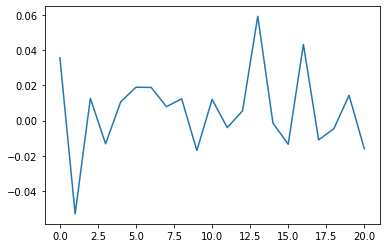

In [158]:
plt.plot([ cmath.sin(r).real for r in results ])


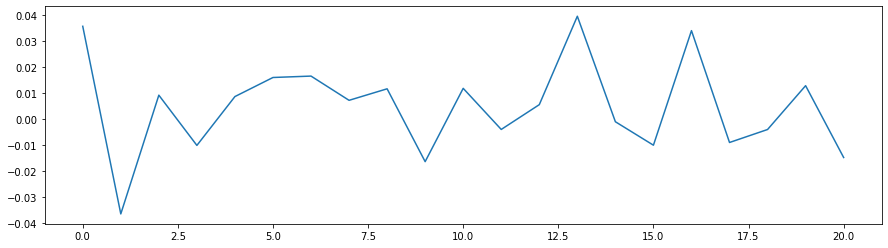

In [133]:
plt.figure(figsize=(15, 4))
plt.plot(ySample)

In [159]:
series = [
    (results[i], i-sampleSize)
    for i in range(0, numSamples)
]

In [160]:
run(series)

In [161]:
series

[((0.03571177151755589+8.746861336171287e-17j), -10),
 ((-0.036456308274431165+0.9201261656835412j), -9),
 ((0.009216550379715157+0.8402523313670827j), -8),
 ((-0.010101135023680458+0.7603784970497145j), -7),
 ((0.008683281138307408+0.6805046627341653j), -6),
 ((0.01601797539424614+0.6006308284158877j), -5),
 ((0.016556458215923154+0.520756994099429j), -4),
 ((0.007235914806154829+0.4408831597829703j), -3),
 ((0.011665780346379596+0.36100932546833064j), -2),
 ((-0.016348996734539448+0.281135491150053j), -1),
 ((0.011843434937051756+0.20126165683177533j), 0),
 ((-0.0039659153897222115+0.12138782251713565j), 1),
 ((0.0055677507394520575+0.04151398819885799j), 2),
 ((0.039576060123264686+0.9616401538805803j), 3),
 ((-0.0010017882842958924+0.8817663195659406j), 4),
 ((-0.010023136822040719+0.801892485251301j), 5),
 ((0.034039894059232974+0.7220186509366613j), 6),
 ((-0.008980916443994022+0.6421448166147457j), 7),
 ((-0.0039886919132696794+0.562270982300106j), 8),
 ((0.012868403937729098+0.

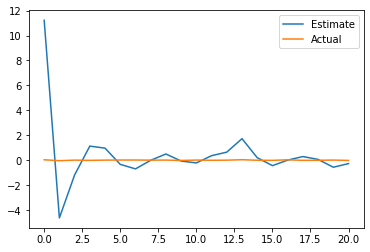

In [164]:
hfun = lambda c,n,t: c*cmath.exp(2*cmath.pi*1j*n*t)

precision = 1
estYs = []
estXs = np.arange(0, numSamples-1+precision, precision)
for i in rX:
    harmonics = np.array(list(map(lambda n: harmonic(n, i), series)))
    y = harmonics[:,1].sum()
    estYs.append(y)
    
plt.plot(estXs, estYs, label="Estimate")
plt.plot(ySample, label="Actual")
plt.legend()


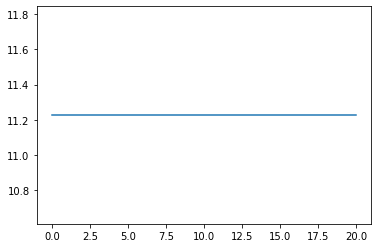

In [163]:
plt.plot(estYs, label="Estimate")


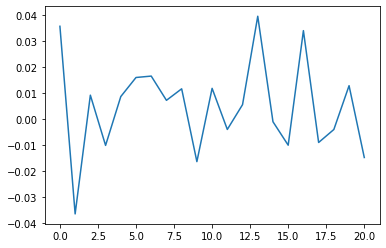

In [139]:
plt.plot(rY)

In [98]:
rX

[0.0,
 -4.217390109637649e-15,
 2.1324039792399094e-15,
 5.6813275091104016e-15,
 4.018046338234555e-15,
 -1.9871457318675412e-14,
 -1.862417664847795e-14,
 -7.302525189778809e-15,
 1.0796298140486408e-14,
 1.2716882376105016e-14,
 -2.9385275737489494e-14,
 2.167261229911812e-15,
 -1.252620239835075e-14,
 -1.5644748459235323e-13,
 2.02202053973312e-15,
 8.393197562626571e-16,
 6.300561711640442e-14,
 3.1346543651828544e-14,
 6.205117869823209e-15,
 4.877066075127106e-15,
 7.323653406396216e-14]